# 개요
본 프로젝트는 축제의 외부 유입성을 객관적으로 측정하기 위한 지표를 개발하는 데 초점을 맞추었다.  
OD 데이터를 활용하여 방문자의 이동 거리 및 체류 목적 컬럼을 이용하여 전처리하고, 축제 전·후 방문자 수 차이를 비교하여 외부 유입 효과를 정량적으로 평가하였다.  
데이터 전처리 과정에서 대용량 데이터를 효율적으로 처리하기 위해 데이터베이스(Mysql)를 활용하였다.  
데이터베이스를 활용하여 체류 목적 컬럼을 통한 여행과 관련없는 데이터는 제외하여 추출하였다.  
그 이후 지표를 개발하기 위해 한국관광데이터랩(https://datalab.visitkorea.or.kr)에 나와 있는 축제들을 기준으로 하여 개발했다.  
많은 축제들 중 제공된 데이터의 기간인 2023-09-01 ~ 2023-10-15 안에 진행되었던 축제들을 이용하였다.  

In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import numpy as np

In [2]:
file_paths = [
    r"C:\Users\Admin\Desktop\공모전\빅콘\마지막전처리\강릉커피축제.csv", # 0
    r"C:\Users\Admin\Desktop\공모전\빅콘\마지막전처리\관악강감찬축제.csv", # 1
    r"C:\Users\Admin\Desktop\공모전\빅콘\마지막전처리\군산시간여행축제.csv", # 2
    r"C:\Users\Admin\Desktop\공모전\빅콘\마지막전처리\금산세계인삼축제.csv", # 3
    r"C:\Users\Admin\Desktop\공모전\빅콘\마지막전처리\금호강바람소리길축제.csv", # 4
    r"C:\Users\Admin\Desktop\공모전\빅콘\마지막전처리\대구치맥페스티벌.csv", # 5
    r"C:\Users\Admin\Desktop\공모전\빅콘\마지막전처리\대전효문화뿌리축제.csv", # 6
    r"C:\Users\Admin\Desktop\공모전\빅콘\마지막전처리\동래읍성역사축제.csv", # 7
    r"C:\Users\Admin\Desktop\공모전\빅콘\마지막전처리\무주반딧불축제.csv", # 8
    r"C:\Users\Admin\Desktop\공모전\빅콘\마지막전처리\부천국제만화축제.csv", # 9
    r"C:\Users\Admin\Desktop\공모전\빅콘\마지막전처리\부평풍물대축제.csv", # 10
    r"C:\Users\Admin\Desktop\공모전\빅콘\마지막전처리\산청한방약초축제.csv", # 11
    r"C:\Users\Admin\Desktop\공모전\빅콘\마지막전처리\서산해미읍성축제.csv", # 12
    r"C:\Users\Admin\Desktop\공모전\빅콘\마지막전처리\세종축제.csv", # 13
    r"C:\Users\Admin\Desktop\공모전\빅콘\마지막전처리\소래포구축제.csv", # 14
    r"C:\Users\Admin\Desktop\공모전\빅콘\마지막전처리\수성못페스티벌.csv", # 15
    r"C:\Users\Admin\Desktop\공모전\빅콘\마지막전처리\수원화성문화제.csv", # 16
    r"C:\Users\Admin\Desktop\공모전\빅콘\마지막전처리\순창장류축제.csv", # 17
    r"C:\Users\Admin\Desktop\공모전\빅콘\마지막전처리\시흥갯골축제.csv", # 18
    r"C:\Users\Admin\Desktop\공모전\빅콘\마지막전처리\안동국제탈춤페스티벌.csv", # 19
    r"C:\Users\Admin\Desktop\공모전\빅콘\마지막전처리\안성맞춤남사당바우덕이축제.csv", # 20
    r"C:\Users\Admin\Desktop\공모전\빅콘\마지막전처리\양양송이축제.csv", # 21
    r"C:\Users\Admin\Desktop\공모전\빅콘\마지막전처리\영도다리축제.csv", # 22
    r"C:\Users\Admin\Desktop\공모전\빅콘\마지막전처리\난계국악축제.csv", # 23
    r"C:\Users\Admin\Desktop\공모전\빅콘\마지막전처리\영산강서창들녘억새축제.csv", # 24
    r"C:\Users\Admin\Desktop\공모전\빅콘\마지막전처리\영주풍기인삼축제.csv", # 25
    r"C:\Users\Admin\Desktop\공모전\빅콘\마지막전처리\원주다이내믹댄싱카니발.csv", # 26
    r"C:\Users\Admin\Desktop\공모전\빅콘\마지막전처리\임실치즈축제.csv", #27
    r"C:\Users\Admin\Desktop\공모전\빅콘\마지막전처리\정선아리랑제.csv", # 28
    r"C:\Users\Admin\Desktop\공모전\빅콘\마지막전처리\지용제.csv", # 29
    r"C:\Users\Admin\Desktop\공모전\빅콘\마지막전처리\진안홍삼축제.csv", # 30
    r"C:\Users\Admin\Desktop\공모전\빅콘\마지막전처리\진주남강유등축제.csv", # 31
    r"C:\Users\Admin\Desktop\공모전\빅콘\마지막전처리\천안흥타령춤축제.csv", # 32
    r"C:\Users\Admin\Desktop\공모전\빅콘\마지막전처리\광주추억의충장축제.csv", # 33
    r"C:\Users\Admin\Desktop\공모전\빅콘\마지막전처리\탐라문화제.csv", # 34
    r"C:\Users\Admin\Desktop\공모전\빅콘\마지막전처리\평창효석문화제.csv", # 35
    r"C:\Users\Admin\Desktop\공모전\빅콘\마지막전처리\한성백제문화제.csv", # 36
    r"C:\Users\Admin\Desktop\공모전\빅콘\마지막전처리\횡성한우축제.csv", # 37
    r"C:\Users\Admin\Desktop\공모전\빅콘\마지막전처리\여의도불꽃축제.csv" #38
]

dataframes = []

for path in file_paths:
    df = pd.read_csv(path)
    dataframes.append(df)

In [3]:
df_test1 = pd.read_csv(r"C:\Users\Admin\Desktop\공모전\빅콘\마지막전처리\횡성한우축제.csv")# 37

df_test2 = pd.read_csv(r"C:\Users\Admin\Desktop\공모전\빅콘\마지막전처리\임실치즈축제.csv")

## 외부 방문객

출발지 행정동코드와 도착지 행정동코드를 비교하여 외부 방문객인지에 대한 판단을 내림.  
행정동 코드 10자리 중 1~2자리는 시·도 코드이고, 3~5 자리는 시·군·구 코드 이므로 1~5자리 값이 같은 경우 내부인으로 판단하여 전처리하였다.

In [4]:
def mark_external_visitors(df_visitors):
    # 도착 행정동코드가 하나의 값만 존재한다고 가정하고 첫 번째 값을 추출
    destination_code = df_visitors['dest_hdong_cd'].iloc[0]
    destination_prefix = str(destination_code)[:5]

    # 외부 방문객 여부 계산
    df_visitors['is_external_visitor'] = df_visitors['origin_hdong_cd'].astype(str).apply(
        lambda x: 0 if x.startswith(destination_prefix) else 1)
    
    return df_visitors

In [5]:
for i in range(len(dataframes)):
    dataframes[i] = mark_external_visitors(dataframes[i])

## 이동 거리에 따른 가중치 부여

이 연구에서는 기존의 관광객 유입 연구 및 도시 이동성(Mobility) 관련 논문을 참고하여 이동 거리와 축제 방문 간의 관계를 분석하였다.

국민국내관광객의 이동시간거리에 대한 수요 탄력성 분석 P.7 에 따르면 ‘ 국내 관광 수요는 출발지에서 멀어질수록 급감하고, 거리가 늘어날수록 지출 비용과 숙박 비율이 증가한다.’  
➔ 지출 비용과 숙박 비용이 증가한다는 점은, 관광객이 오랜시간 해당 축제에 참여한다는 의미로 해석되어 더 높은 가중치를 부여하였다.



In [6]:
def add_weight_column(df_visitors):
    """
    이동 거리('od_dist_avg')를 기준으로 가중치(1점 또는 2점)를 할당하는 컬럼을 추가하는 함수.
    
    매개변수:
    - df_visitors: 전체 방문 데이터 (이동 거리 및 인구 수 포함)
    
    반환값:
    - 가중치(1점 또는 2점)가 포함된 데이터프레임
    """
    # 구간별 가중치 적용 (1점과 2점)
    def apply_weight(distance):
        if distance > 87600:  # 3구간 (75.2분 이상, 87.6km 이상)
            return 2  # 가중치 2점
        elif distance > 13590:  # 2구간 (11.7분 이상 75.1분 이하, 13.59km ~ 87.07km)
            return 1  # 가중치 1점
        else:
            return 0.5  # 구간 1은 0점
    
    # 가중치 컬럼 추가
    df_visitors['weight'] = df_visitors['od_dist_avg'].apply(apply_weight)
    return df_visitors

In [7]:
# 휴일 리스트 설정 (int 형식)
holidays = [
    20230902, 20230903, 20230909, 20230910, 20230916, 20230917,
    20230923, 20230924, 20230928, 20230929, 20230930, 20231001,
    20231002, 20231003, 20231007, 20231008, 20231009, 20231014, 20231015
]

def add_day_of_week_column(dataframes, holidays):
    """
    여러 개의 DataFrame에서 'day_of_week' 컬럼을 추가하는 함수.
    
    매개변수:
    - dataframes: DataFrame들의 리스트
    - holidays: 주말/공휴일 리스트 (int 형식 날짜 리스트)
    
    반환값:
    - 'day_of_week' 컬럼이 추가된 DataFrame들의 리스트
    """
    for df in dataframes:
        # day_of_week 컬럼 추가: date 값이 holidays에 있으면 1, 아니면 0
        df['day_of_week'] = df['date'].apply(lambda x: 1 if x in holidays else 0)
    return dataframes


In [8]:
# day_of_week 컬럼 추가 함수 호출
dataframes = add_day_of_week_column(dataframes, holidays)

# 결과 확인
for i, df in enumerate(dataframes):
    print(f"DataFrame {i}:\n", df)

DataFrame 0:
        origin_hdong_cd  dest_hdong_cd      date  dest_purpose  od_dist_avg  \
0           5115059000     5115057200  20230901             5        16581   
1           5115036000     5115057200  20230901             3        31848   
2           5115059000     5115057200  20230901             4        21231   
3           5115031000     5115057200  20230901             5       123083   
4           5115064500     5115057200  20230901             4        23158   
...                ...            ...       ...           ...          ...   
41694       5115052000     5115057200  20231015             3        40098   
41695       5115057100     5115057200  20231015             3         7792   
41696       5115056000     5115057200  20231015             3        14336   
41697       5115066500     5115057200  20231015             5       320011   
41698       5115025000     5115057200  20231015             3        40345   

       total_people_count  is_external_visitor  d

In [9]:
for i in range(len(dataframes)):
    dataframes[i] = add_weight_column(dataframes[i])

In [10]:
# 시작일 리스트 (start_dates) - 20230901 이하 값을 20230901로 고정 (int로 변환)
start_dates = [
    20231012, 20231013, 20231006, 20231006, 20230915, 20230901, 
    20231013, 20231013, 20230901, 20230914, 20230922, 20231006, 
    20231006, 20231006, 20230915, 20230922, 20231007, 20231013, 
    20230923, 20231002, 20230930, 20231004, 20231014, 20231012, 
    20231006, 20231007, 20230922, 20231006, 20230914, 20230901, 
    20230922, 20231008, 20231005, 20231005, 20231006, 20230901, 
    20230922, 20231006, 20231007
]

# 종료일 리스트 (end_dates) - 20231016 이상 값을 20231015로 고정 (int로 변환)
end_dates = [
    20231015, 20231015, 20231009, 20231015, 20230917, 20230903, 
    20231015, 20231015, 20230910, 20230917, 20230924, 20231010, 
    20231008, 20231009, 20230917, 20230924, 20231009, 20231015, 
    20230925, 20231009, 20231003, 20231008, 20231015, 20231015, 
    20231010, 20231015, 20230924, 20231009, 20230917, 20230910, 
    20230924, 20231015, 20231009, 20231009, 20231010, 20230917, 
    20230924, 20231010, 20231007
]

# 행정동 코드 리스트 (int로 변환)
hdong_codes = [
    5115057200, 1162058500, 4513053000, 4471025000, 2723062000, 
    2729055000, 3014074000, 2626054500, 4573025000, 4119074400, 
    2823751000, 4886034000, 4421039000, 3611051800, 2820071000, 
    2726064000, 4111574000, 4577025000, 4139063100, 4717051000, 
    4155031000, 5183025000, 2620065000, 4374025000, 2914080000, 
    4721025000, 5113054100, 4575034000, 5177025000, 4373025000, 
    4572025000, 4817055500, 4413356000, 2911052500, 5011051000, 
    5176034000, 1171056600, 5173025000, 1156054000	
]

In [11]:
def calculate_all_festivals_average_visitors(df_list, start_dates, end_dates, hdong_codes):
    # 축제마다 일별 평균 방문자 수를 저장할 리스트
    all_average_visitors_list = []
    
    for i, df in enumerate(df_list):
        # 각 축제의 시작일, 종료일, 행정동 코드 가져오기
        festival_start = pd.to_datetime(start_dates[i], format='%Y%m%d', errors='coerce')
        festival_end = pd.to_datetime(end_dates[i], format='%Y%m%d', errors='coerce')
        dest_hdong_cd = hdong_codes[i]
        
        # 현재 축제의 데이터프레임이 해당 행정동 코드를 포함하는지 확인
        target_df = df[df['dest_hdong_cd'] == dest_hdong_cd]
        if target_df.empty:
            print(f"해당 행정동 코드를 가진 데이터프레임을 찾을 수 없습니다: 행정동 코드 {dest_hdong_cd}")
            all_average_visitors_list.append(None)
            continue

        # 외부 방문자로 필터링 (앞 5자리가 다른 경우만 선택)
        target_df = target_df[target_df['origin_hdong_cd'].astype(str).str[:5] != target_df['dest_hdong_cd'].astype(str).str[:5]]

        # 날짜 형식 변환
        target_df.loc[:, 'date'] = pd.to_datetime(target_df['date'], format='%Y%m%d', errors='coerce')

        # 축제 및 비축제 기간 데이터프레임 생성
        df_festival = target_df[(target_df['date'] >= festival_start) & (target_df['date'] <= festival_end)]
        df_non_festival = target_df[~((target_df['date'] >= festival_start) & (target_df['date'] <= festival_end))]

        # 축제와 비축제 기간의 방문자 수 합계 계산
        festival_sum = df_festival['total_people_count'].sum() if not df_festival.empty else 0
        non_festival_sum = df_non_festival['total_people_count'].sum() if not df_non_festival.empty else 0

        # 축제와 비축제 기간의 정확한 날짜 수 계산
        festival_days = (festival_end - festival_start).days + 1 if festival_start <= festival_end else 0
        total_days = target_df['date'].nunique()  # 전체 기간의 고유 날짜 수
        non_festival_days = total_days - festival_days  # 비축제 기간의 날짜 수

        # 축제 및 비축제 기간의 평균 방문자 수 계산
        festival_avg = festival_sum / festival_days if festival_days > 0 else 0
        non_festival_avg = non_festival_sum / non_festival_days if non_festival_days > 0 else 0

        # 결과를 리스트에 저장
        all_average_visitors_list.append((festival_avg, non_festival_avg, festival_days, non_festival_days))

    return all_average_visitors_list

In [12]:
# 함수 호출 및 각 축제별 평균 방문자 수와 기간 일수 출력
all_average_visitors_list = calculate_all_festivals_average_visitors(dataframes, start_dates, end_dates, hdong_codes)
for i, (festival_avg, non_festival_avg, festival_days, non_festival_days) in enumerate(all_average_visitors_list):
    print(f"축제 {i+1}의 평균 방문자 수 (축제 기간): {festival_avg}, 비축제 기간: {non_festival_avg}")
    print(f"축제 {i+1}의 기간 일수 (축제 기간): {festival_days}일, 비축제 기간: {non_festival_days}일\n")

C:\Users\Admin\AppData\Local\Temp\ipykernel_1584\3382819952.py:22: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '<DatetimeArray>
['2023-09-01 00:00:00', '2023-09-01 00:00:00', '2023-09-01 00:00:00',
 '2023-09-01 00:00:00', '2023-09-01 00:00:00', '2023-09-01 00:00:00',
 '2023-09-01 00:00:00', '2023-09-01 00:00:00', '2023-09-01 00:00:00',
 '2023-09-01 00:00:00',
 ...
 '2023-10-15 00:00:00', '2023-10-15 00:00:00', '2023-10-15 00:00:00',
 '2023-10-15 00:00:00', '2023-10-15 00:00:00', '2023-10-15 00:00:00',
 '2023-10-15 00:00:00', '2023-10-15 00:00:00', '2023-10-15 00:00:00',
 '2023-10-15 00:00:00']
Length: 5216, dtype: datetime64[ns]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  target_df.loc[:, 'date'] = pd.to_datetime(target_df['date'], format='%Y%m%d', errors='coerce')
C:\Users\Admin\AppData\Local\Temp\ipykernel_1584\3382819952.py:22: FutureWarning: Setting an item of inco

축제 1의 평균 방문자 수 (축제 기간): 1163.75, 비축제 기간: 685.1219512195122
축제 1의 기간 일수 (축제 기간): 4일, 비축제 기간: 41일

축제 2의 평균 방문자 수 (축제 기간): 2864.3333333333335, 비축제 기간: 1660.047619047619
축제 2의 기간 일수 (축제 기간): 3일, 비축제 기간: 42일

축제 3의 평균 방문자 수 (축제 기간): 15198.25, 비축제 기간: 7599.829268292683
축제 3의 기간 일수 (축제 기간): 4일, 비축제 기간: 41일

축제 4의 평균 방문자 수 (축제 기간): 4975.1, 비축제 기간: 2197.114285714286
축제 4의 기간 일수 (축제 기간): 10일, 비축제 기간: 35일

축제 5의 평균 방문자 수 (축제 기간): 4483.0, 비축제 기간: 2812.2619047619046
축제 5의 기간 일수 (축제 기간): 3일, 비축제 기간: 42일

축제 6의 평균 방문자 수 (축제 기간): 3127.0, 비축제 기간: 686.4047619047619
축제 6의 기간 일수 (축제 기간): 3일, 비축제 기간: 42일

축제 7의 평균 방문자 수 (축제 기간): 19713.333333333332, 비축제 기간: 11792.190476190477
축제 7의 기간 일수 (축제 기간): 3일, 비축제 기간: 42일

축제 8의 평균 방문자 수 (축제 기간): 837.3333333333334, 비축제 기간: 279.26190476190476
축제 8의 기간 일수 (축제 기간): 3일, 비축제 기간: 42일

축제 9의 평균 방문자 수 (축제 기간): 1263.9, 비축제 기간: 158.74285714285713
축제 9의 기간 일수 (축제 기간): 10일, 비축제 기간: 35일

축제 10의 평균 방문자 수 (축제 기간): 49.25, 비축제 기간: 36.89473684210526
축제 10의 기간 일수 (축제 기간): 4일, 비축제 기간: 

C:\Users\Admin\AppData\Local\Temp\ipykernel_1584\3382819952.py:22: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '<DatetimeArray>
['2023-09-01 00:00:00', '2023-09-01 00:00:00', '2023-09-01 00:00:00',
 '2023-09-01 00:00:00', '2023-09-01 00:00:00', '2023-09-01 00:00:00',
 '2023-09-01 00:00:00', '2023-09-01 00:00:00', '2023-09-01 00:00:00',
 '2023-09-01 00:00:00',
 ...
 '2023-10-15 00:00:00', '2023-10-15 00:00:00', '2023-10-15 00:00:00',
 '2023-10-15 00:00:00', '2023-10-15 00:00:00', '2023-10-15 00:00:00',
 '2023-10-15 00:00:00', '2023-10-15 00:00:00', '2023-10-15 00:00:00',
 '2023-10-15 00:00:00']
Length: 9132, dtype: datetime64[ns]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  target_df.loc[:, 'date'] = pd.to_datetime(target_df['date'], format='%Y%m%d', errors='coerce')
C:\Users\Admin\AppData\Local\Temp\ipykernel_1584\3382819952.py:22: FutureWarning: Setting an item of inco

In [13]:
def calculate_all_festivals_average_visitors_with_weighted_log_diff(df_list, start_dates, end_dates, hdong_codes, weight_1=0.6, weight_2=0.4):
    # 축제마다 일별 평균 방문자 수를 저장할 리스트
    all_average_visitors_list = []
    difference_list = []
    log_difference_list = []

    for i, df in enumerate(df_list):
        # 각 축제의 시작일, 종료일, 행정동 코드 가져오기
        festival_start = pd.to_datetime(start_dates[i], format='%Y%m%d', errors='coerce')
        festival_end = pd.to_datetime(end_dates[i], format='%Y%m%d', errors='coerce')
        dest_hdong_cd = hdong_codes[i]
        
        # 현재 축제의 데이터프레임이 해당 행정동 코드를 포함하는지 확인
        target_df = df[df['dest_hdong_cd'] == dest_hdong_cd]
        if target_df.empty:
            all_average_visitors_list.append(None)
            difference_list.append(None)
            log_difference_list.append(0)
            continue

        # 외부 방문자로 필터링 (앞 5자리가 다른 경우만 선택)
        target_df = target_df[target_df['origin_hdong_cd'].astype(str).str[:5] != target_df['dest_hdong_cd'].astype(str).str[:5]]

        # 날짜 형식 변환 (필요한 경우)
        if not np.issubdtype(target_df['date'].dtype, np.datetime64):
            target_df['date'] = pd.to_datetime(target_df['date'], format='%Y%m%d', errors='coerce')

        # `total_people_count * weight` 적용하여 가중 방문자 수 계산
        target_df['weighted_people_count'] = target_df['total_people_count'] * target_df['weight']

        # 축제 및 비축제 기간 데이터프레임 생성
        df_festival = target_df[(target_df['date'] >= festival_start) & (target_df['date'] <= festival_end)]
        df_non_festival = target_df[~((target_df['date'] >= festival_start) & (target_df['date'] <= festival_end))]

        # 비축제 기간에서 'day_of_week' 컬럼을 사용하여 주말/공휴일과 평일 구분
        weekend_holiday_df = df_non_festival[df_non_festival['day_of_week'] == 1]
        weekday_df = df_non_festival[df_non_festival['day_of_week'] == 0]

        # 축제 기간 동안의 주말/공휴일과 평일 일수 계산
        festival_weekend_days = df_festival[df_festival['day_of_week'] == 1]['date'].nunique()
        festival_weekday_days = df_festival[df_festival['day_of_week'] == 0]['date'].nunique()

        # 가중 방문자 수 합계 계산
        festival_sum = df_festival['weighted_people_count'].sum() if not df_festival.empty else 0
        weekend_holiday_sum = weekend_holiday_df['weighted_people_count'].sum() if not weekend_holiday_df.empty else 0
        weekday_sum = weekday_df['weighted_people_count'].sum() if not weekday_df.empty else 0

        #축제 기간 일별 평균 계산
        festival_days = df_festival['date'].nunique()
        festival_avg = df_festival['weighted_people_count'].sum() / festival_days if festival_days > 0 else 0

        # 비축제 기간에서 주말/공휴일과 평일의 일별 평균 계산
        weekend_holiday_avg = weekend_holiday_sum / weekend_holiday_df['date'].nunique() if weekend_holiday_df['date'].nunique() > 0 else 0
        weekday_avg = weekday_sum / weekday_df['date'].nunique() if weekday_df['date'].nunique() > 0 else 0

        # 비축제 기간의 일별 평균을 축제 기간의 주말/공휴일 및 평일 일수를 가중치로 적용하여 계산
        adjusted_non_festival_avg = ((weekend_holiday_avg * festival_weekend_days) + (weekday_avg * festival_weekday_days)) / (festival_weekend_days + festival_weekday_days) if (festival_weekend_days + festival_weekday_days) > 0 else 0

        print(festival_avg, adjusted_non_festival_avg)

        # 1. 축제와 비축제 기간의 일별 평균 차이에 로그 스케일 적용
        visitor_difference = festival_avg - adjusted_non_festival_avg
        log_difference_1 = np.log10(visitor_difference) if visitor_difference > 0 else 0

        # 2. 축제와 비축제 기간의 일별 평균 비율에 로그 스케일 적용
        visitor_ratio = festival_avg / adjusted_non_festival_avg if adjusted_non_festival_avg > 0 else 0
        log_ratio = np.log10(visitor_ratio) if visitor_ratio > 0 else 0

        print(log_difference_1, log_ratio)

        # 가중 평균을 사용하여 최종 로그 차이 계산
        log_difference = (log_difference_1 * weight_1) + (log_ratio * weight_2)
        log_difference_list.append(log_difference)

    # 기본 민맥스 스케일 적용
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_log_differences = scaler.fit_transform(np.array(log_difference_list).reshape(-1, 1)).flatten()

    # 최대값을 0.9로 조정
    scaled_log_differences = scaled_log_differences * 0.9

    return all_average_visitors_list, log_difference_list, scaled_log_differences

In [14]:
all_average_visitors, log_differences, scaled_log_differences = calculate_all_festivals_average_visitors_with_weighted_log_diff(dataframes, start_dates, end_dates, hdong_codes)

2159.5 1425.5833333333333
2.8656467502955913 0.18036059905019902
2948.0 2162.298039215686
2.8952578369640944 0.13461192469186503
25619.875 17696.329375
3.8989195630031683 0.16069381342371744
7851.35 3711.773809523809
3.616955880357813 0.3253628348750877
5088.0 4251.9623529411765
2.922225834307175 0.07795769203422719
2953.8333333333335 766.6650980392156
3.3398821899191296 0.5857802943829534
23587.166666666668 17298.362352941178
3.798568081166547 0.13467078563834226
786.1666666666666 306.3635294117647
2.6810630833317655 0.4092775617616371
2215.15 255.00333333333333
3.2922885683671534 0.9388572825759206
36.125 22.681547619047617
1.1285108131715502 0.20213517152778976
2282.5 1112.166274509804
3.068309720269642 0.31224106487416303
2730.2 1529.475
3.079443553066506 0.2516520796931327
8206.166666666666 4617.298039215687
3.5549575610311073 0.24975242473952367
23.0 39.45454545454545
0 -0.2343692083366928
9091.5 6324.745098039216
3.441970688074592 0.15759251594443652
2125.8333333333335 1428.9941

In [15]:
print("축제별 평균 방문자 수와 로그 스케일 차이값:", all_average_visitors)
print("로그 스케일 차이값 리스트:", log_differences)
print("민맥스 스케일된 로그 차이값 리스트:", scaled_log_differences)

축제별 평균 방문자 수와 로그 스케일 차이값: []
로그 스케일 차이값 리스트: [1.7915322897974344, 1.7909994720552025, 2.4036292631713883, 2.300318662164723, 1.784518577397996, 2.238241431704659, 2.333009162955265, 1.7723488747037142, 2.35091605405066, 0.757960556514046, 1.9658822581114503, 1.9483269637171565, 2.2328755065144734, -0.09374768333467713, 2.1282194192225297, 1.7748790585657277, 2.615631824159805, 1.9258330633608216, 1.53331063367031, 2.204051885025815, -0.08430575800498098, 2.0302794866408123, 2.0124158864393302, 1.8359666708303024, 0.7824441076419135, 1.4278969796949095, 1.241031079661438, 2.4775923023479436, 1.3103504204892897, -0.004584053850969886, 2.2120630622323683, 2.179195826623834, 1.778010806981269, 1.8721069682115412, -0.005164423512353869, 1.661065439805176, 2.67979219525554, 2.206583017014843, 3.042971606666045]
민맥스 스케일된 로그 차이값 리스트: [0.54093204 0.54077917 0.71655735 0.68691506 0.53891964 0.66910361
 0.69629475 0.53542786 0.70143266 0.24437552 0.59095723 0.5859202
 0.667564   0.         0.6375

In [16]:
print("민맥스 스케일된 로그 차이값 리스트:", scaled_log_differences)

민맥스 스케일된 로그 차이값 리스트: [0.54093204 0.54077917 0.71655735 0.68691506 0.53891964 0.66910361
 0.69629475 0.53542786 0.70143266 0.24437552 0.59095723 0.5859202
 0.667564   0.         0.63753566 0.53615383 0.77738597 0.57946616
 0.46684206 0.65929381 0.00270911 0.60943434 0.60430885 0.55368133
 0.25140044 0.43659635 0.38298004 0.73777912 0.40286942 0.02558318
 0.66159241 0.65216201 0.53705241 0.56405085 0.02541666 0.50349798
 0.79579512 0.66002005 0.9       ]


In [17]:
test = np.round(scaled_log_differences * 10, 1)

In [20]:
count = 0
for i in test:
    print(count, i)
    count += 1

0 5.4
1 5.4
2 7.2
3 6.9
4 5.4
5 6.7
6 7.0
7 5.4
8 7.0
9 2.4
10 5.9
11 5.9
12 6.7
13 0.0
14 6.4
15 5.4
16 7.8
17 5.8
18 4.7
19 6.6
20 0.0
21 6.1
22 6.0
23 5.5
24 2.5
25 4.4
26 3.8
27 7.4
28 4.0
29 0.3
30 6.6
31 6.5
32 5.4
33 5.6
34 0.3
35 5.0
36 8.0
37 6.6
38 9.0


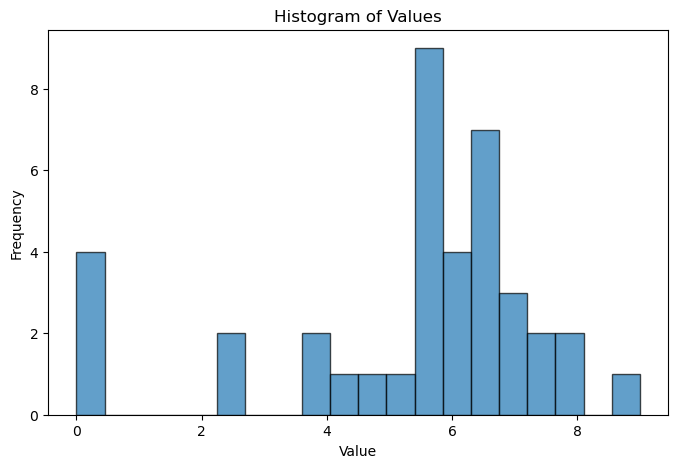

In [ ]:
import matplotlib.pyplot as plt
# 히스토그램 그리기
plt.figure(figsize=(8, 5))
plt.hist(test, bins=20, edgecolor='black', alpha=0.7)
plt.title("Histogram of Values")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()